In [1]:
!pip install pandas matplotlib

In [6]:
import pandas as pd
# Load the dataset
url =  '/content/Au_nanoparticle_dataset.csv' # Replace with the actual path or URL to the dataset

# Check if the file exists
import os
if not os.path.exists(url):
    print(f"Error: File not found at {url}")
else:
    df = pd.read_csv(url)

    # Create a new dataframe by filtering the specified columns
    filtered_df = df[['N_total', 'N_bulk', 'N_surface', 'R_avg']]
    print(filtered_df.head()) # Print the first few rows of the filtered dataframe

   N_total  N_bulk  N_surface    R_avg
0     1599    1014        585  17.3706
1     1642    1034        608  17.6061
2     4637    3365       1272  25.3692
3     7189    5292       1897  29.7011
4    11004    8508       2496  34.2831


In [7]:
# Display the first 20 samples of the filtered dataframe
print(filtered_df.head(20))


    N_total  N_bulk  N_surface    R_avg
0      1599    1014        585  17.3706
1      1642    1034        608  17.6061
2      4637    3365       1272  25.3692
3      7189    5292       1897  29.7011
4     11004    8508       2496  34.2831
5     13375   10768       2607  36.6334
6     13795   11155       2640  37.0108
7     13947   11304       2643  37.1672
8     14020   11357       2663  37.2103
9     14056   11389       2667  37.2467
10     1534     966        568  17.1107
11     1559     974        585  17.2101
12     4356    3099       1257  24.8253
13     6550    4675       1875  29.0376
14    10175    7748       2427  33.4399
15    12393    9842       2551  35.6950
16    13207   10590       2617  36.4657
17    13543   10937       2606  36.7871
18    13713   11079       2634  36.9333
19    13791   11151       2640  37.0104


In [8]:
# Calculate the mean, standard deviation, and quartile values
mean_values = filtered_df.mean()
std_values = filtered_df.std()
quartiles = filtered_df.quantile([0.25, 0.5, 0.75])

# Display the results
print("Mean values:\n", mean_values)
print("\nStandard deviation values:\n", std_values)
print("\nQuartile values:\n", quartiles)


Mean values:
 N_total      3476.786500
N_bulk       2521.550250
N_surface     955.236250
R_avg          20.654363
dtype: float64

Standard deviation values:
 N_total      3679.286769
N_bulk       2976.232459
N_surface     721.870220
R_avg           7.610716
dtype: float64

Quartile values:
       N_total   N_bulk  N_surface      R_avg
0.25   1061.0   618.75     437.00  15.160725
0.50   1867.0  1199.00     666.00  18.629250
0.75   4503.0  3183.00    1301.75  25.525125


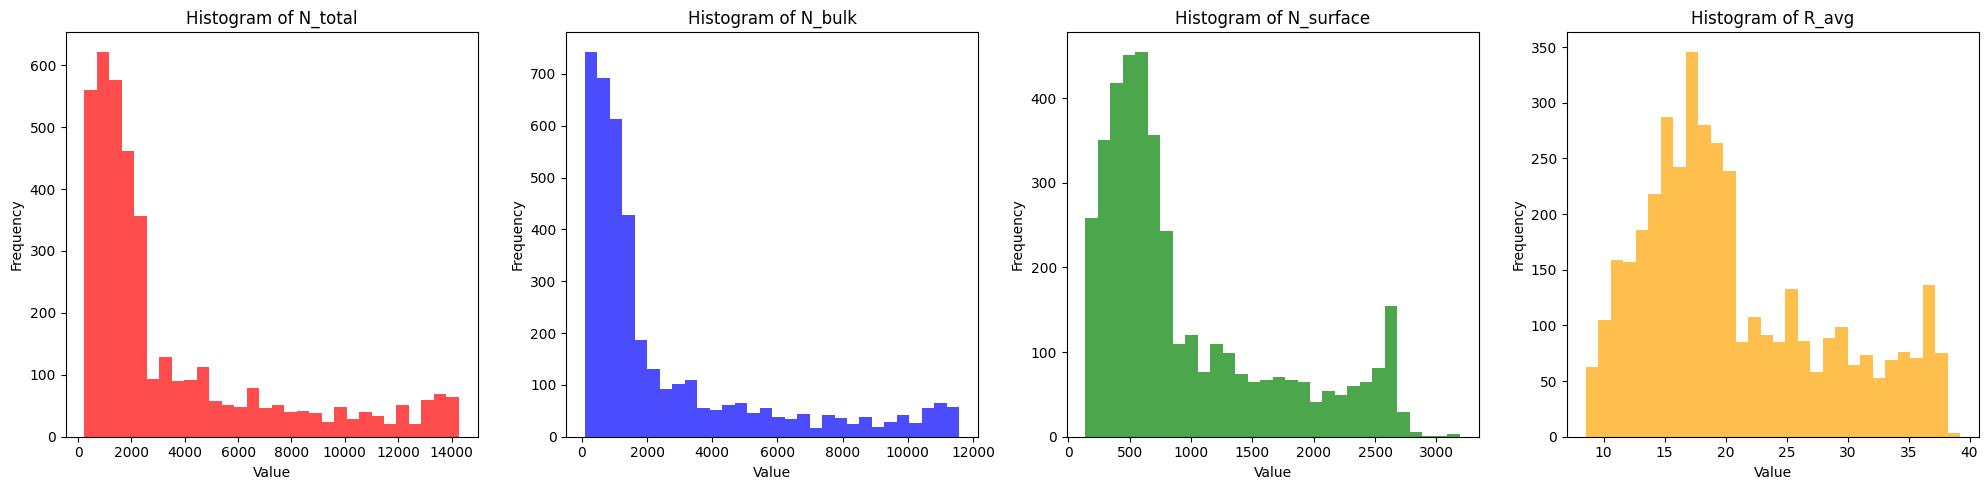

In [9]:
import matplotlib.pyplot as plt

# Plot histograms in a 1x4 layout
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

features = ['N_total', 'N_bulk', 'N_surface', 'R_avg']
colors = ['red', 'blue', 'green', 'orange']

for i, feature in enumerate(features):
    axes[i].hist(filtered_df[feature], bins=30, color=colors[i], alpha=0.7)
    axes[i].set_title(f'Histogram of {feature}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


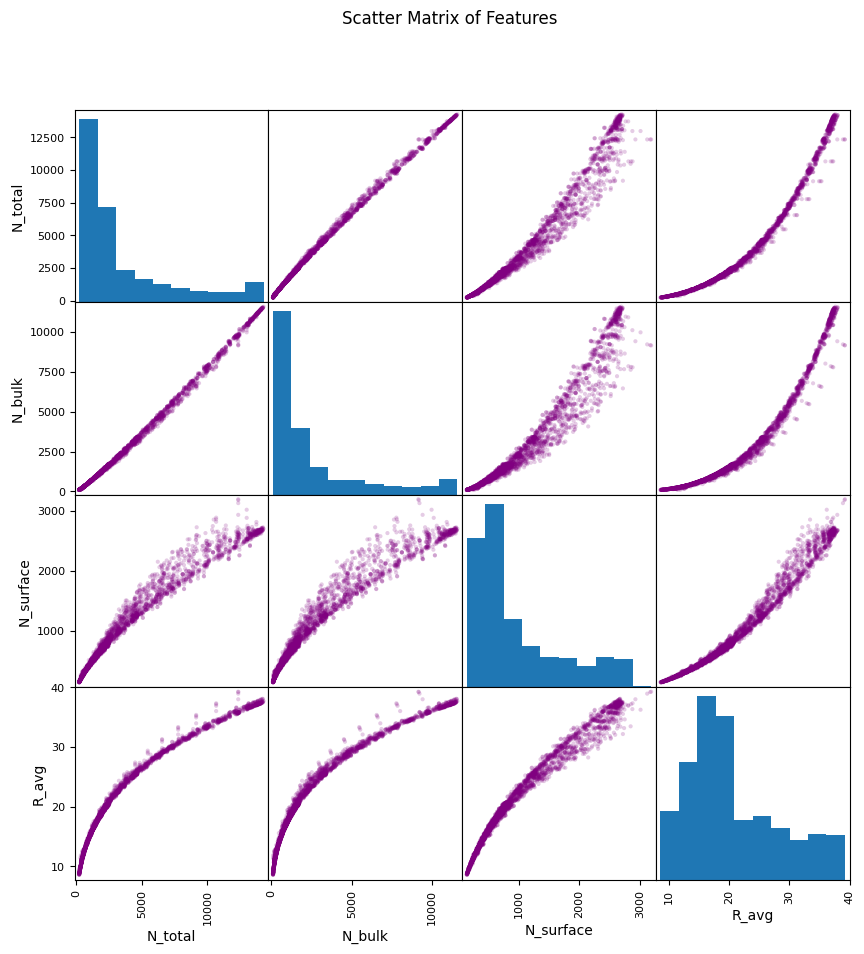

In [10]:
# Visualize scatter plots for each pair of features
pd.plotting.scatter_matrix(filtered_df, alpha=0.2, figsize=(10, 10), diagonal='hist', color='purple')
plt.suptitle('Scatter Matrix of Features')
plt.show()


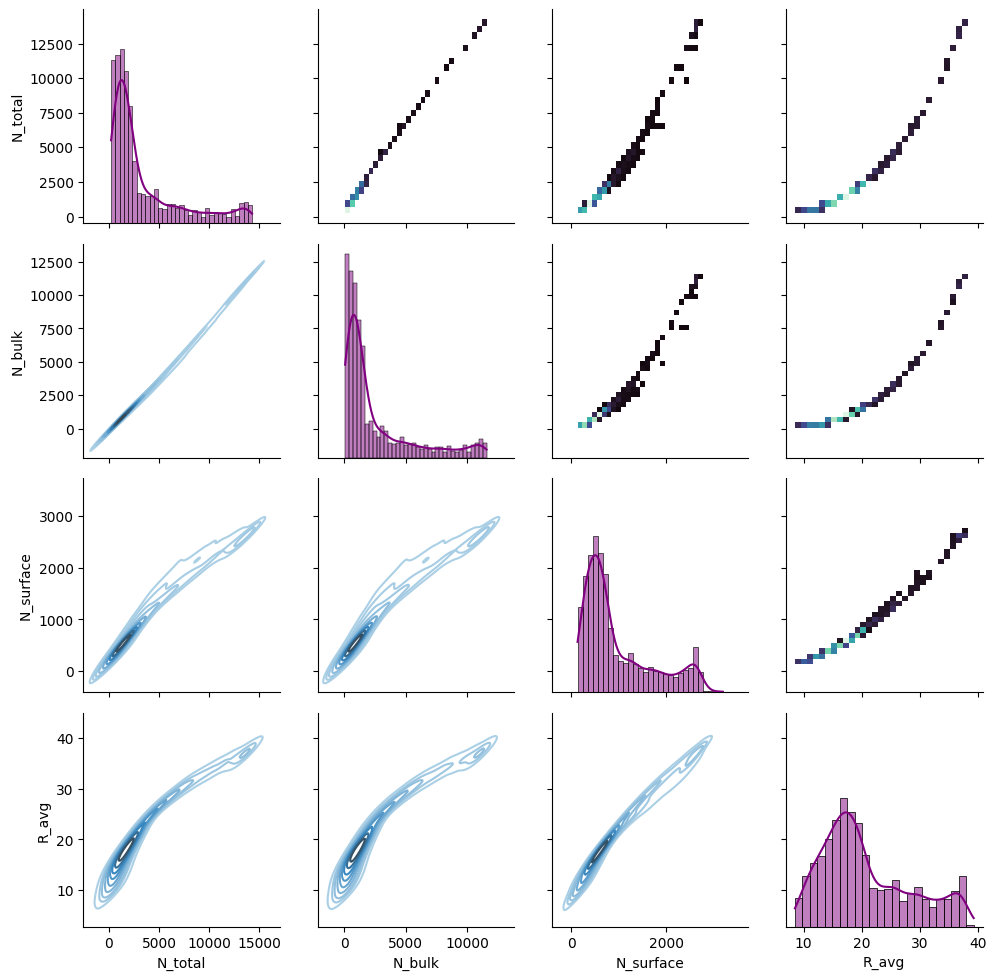

In [14]:
import seaborn as sns  # Import the seaborn library and alias it as 'sns'

g = sns.PairGrid(filtered_df)
g.map_upper(sns.histplot, bins=30, pthresh=.1, cmap="mako")
g.map_diag(sns.histplot, kde=True, color='purple')
g.map_lower(sns.kdeplot, cmap="Blues_d")

plt.show()